In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
customer_data = pd.read_csv('Mall_Customers.csv')

In [5]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [17]:
customer_data.drop('CustomerID', axis=1, inplace=True)

encoder = LabelEncoder()
customer_data['Gender'] = encoder.fit_transform(customer_data['Gender'])

gender_mappings = {index: label for index, label in enumerate(encoder.classes_)}
gender_mappings

{0: 'Female', 1: 'Male'}

In [19]:
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(customer_data), columns=customer_data.columns)
scaled_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


In [20]:
max_clusters = 50
kmeans_tests = [KMeans(n_clusters=i, n_init=10) for i in range(1, max_clusters)]
inertias = [kmeans_tests[i].fit(scaled_data).inertia_ for i in range(len(kmeans_tests))]

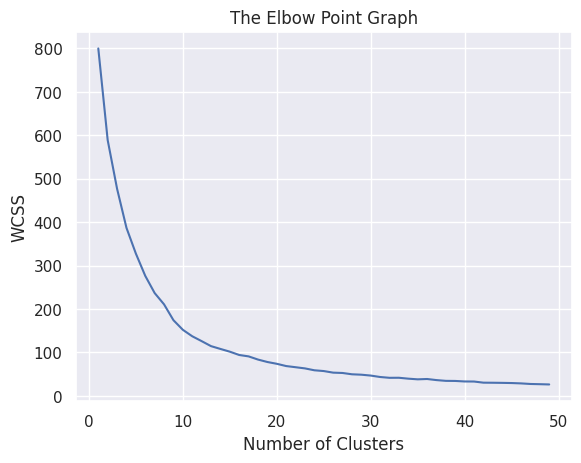

In [21]:
sns.set()
plt.plot(range(1,max_clusters), inertias)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
kmeans = KMeans(n_clusters=10, n_init=10)
kmeans.fit(scaled_data)
clusters = kmeans.predict(scaled_data)
clusters

array([2, 2, 3, 8, 3, 8, 3, 8, 4, 8, 4, 8, 3, 8, 3, 2, 3, 2, 4, 8, 2, 2,
       3, 2, 3, 2, 3, 2, 3, 8, 4, 8, 4, 2, 3, 8, 3, 8, 3, 8, 6, 2, 4, 0,
       3, 8, 6, 0, 0, 0, 6, 2, 0, 4, 6, 4, 6, 4, 0, 4, 4, 2, 6, 6, 4, 2,
       6, 6, 2, 0, 4, 6, 6, 6, 4, 2, 6, 2, 0, 6, 4, 2, 4, 6, 0, 4, 6, 0,
       0, 6, 6, 2, 4, 0, 0, 2, 6, 0, 4, 2, 0, 6, 4, 2, 4, 0, 6, 4, 4, 4,
       4, 0, 0, 2, 0, 0, 6, 6, 6, 6, 2, 0, 0, 7, 0, 5, 1, 7, 4, 7, 1, 7,
       0, 5, 1, 5, 9, 7, 1, 5, 9, 7, 0, 5, 1, 7, 1, 5, 9, 7, 1, 7, 9, 5,
       9, 5, 1, 5, 1, 5, 6, 5, 1, 5, 1, 5, 1, 5, 9, 7, 1, 7, 1, 7, 9, 5,
       1, 7, 1, 7, 9, 5, 1, 5, 9, 7, 9, 7, 9, 5, 9, 5, 1, 5, 9, 5, 9, 7,
       1, 7], dtype=int32)

In [24]:
pca = PCA(n_components=2)
reduced_data = pd.DataFrame(pca.fit_transform(scaled_data), columns=['PC1', 'PC2'])
reduced_centers = pca.transform(kmeans.cluster_centers_)
reduced_centers

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


array([[-0.662429  , -0.58044771],
       [ 1.19961046,  1.30582744],
       [-0.68838314,  0.28733559],
       [ 0.75229959, -1.61087948],
       [ 1.5303687 ,  0.17028966],
       [-1.38150389,  0.3644368 ],
       [ 0.58233488, -0.85939176],
       [-0.88272588,  1.65431318],
       [-1.6696024 , -1.35294268],
       [ 0.81659377,  0.24505923]])

In [25]:
reduced_data['cluster'] = clusters

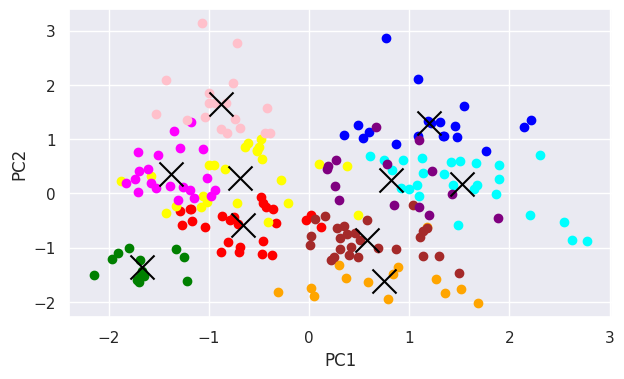

In [27]:
plt.figure(figsize=(7, 4))

plt.scatter(reduced_data[reduced_data['cluster'] == 0].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 0].loc[:, 'PC2'], color='red')
plt.scatter(reduced_data[reduced_data['cluster'] == 1].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 1].loc[:, 'PC2'], color='blue')
plt.scatter(reduced_data[reduced_data['cluster'] == 2].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 2].loc[:, 'PC2'], color='yellow')
plt.scatter(reduced_data[reduced_data['cluster'] == 3].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 3].loc[:, 'PC2'], color='orange')
plt.scatter(reduced_data[reduced_data['cluster'] == 4].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 4].loc[:, 'PC2'], color='cyan')
plt.scatter(reduced_data[reduced_data['cluster'] == 5].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 5].loc[:, 'PC2'], color='magenta')
plt.scatter(reduced_data[reduced_data['cluster'] == 6].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 6].loc[:, 'PC2'], color='brown')
plt.scatter(reduced_data[reduced_data['cluster'] == 7].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 7].loc[:, 'PC2'], color='pink')
plt.scatter(reduced_data[reduced_data['cluster'] == 8].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 8].loc[:, 'PC2'], color='green')
plt.scatter(reduced_data[reduced_data['cluster'] == 9].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 9].loc[:, 'PC2'], color='purple')

plt.scatter(reduced_centers[:, 0], reduced_centers[:, 1], color='black', marker='x', s=300)

plt.xlabel("PC1")
plt.ylabel("PC2")

plt.show()